# Комментарий наставника

Привет! 

Пример как я бы считал накопленным итогом я привел. Кажется, в итоге все должно совпасть дальше. 

Обрати внимание, у тебя есть небольшая ошибка (выделен красным комментарий) в отсеивании странных пользователей, но очевидно, что это опечатка - не вижу смысла отправлять проект на доработку. Возможно, имело смысл посмотреть сколько у тебя таких пользователей странных, чтобы избежать ошибок, но универсального способа не ошибаться - не бывает, к сожалению. 

В остальном, все отлично!

------------
# Часть 1. Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
   1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

------------

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [2]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [4]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [5]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


In [6]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [7]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


# Комментарий наставника
Кажется, это было слишком просто, чтобы где-то ошибиться :)

РЕЗЮМЕ оп проделанной работе
------
   1. Прочитан файл hypothesis.csv (/datasets/hypothesis.csv).
   2. Рассчитан показатель ICE для приоритизации гипотез. Отсортированны гипотизы по убыванию приоритета.
   3. Рассчитан показатель RICE для приоритизации гипотез. Отсортированны гипотизы по убыванию приоритета.

# <font color='blue'>Вывод</font> 

1. При определении приоритизации задача методом __ICE__ получилась следующая структура:
   - запустить акцию, дающую скидку на товар в день рождения __(9 задача)__;
   - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей __(1 задача)__;
   - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок __(8 задача)__;
   - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию __(7 задача)__;
   - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа __(3 задача)__;
   - запустить собственную службу доставки, что сократит срок доставки заказов __(2 задача)__;
   - добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов __(6 задача)__;
   - изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар __(4 задача)__;
   - изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей __(5 задача)__.	
   
   
2. При определении приоритизации задача методом __RICE__ получилась следующая структура:
   - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок __(8 задача)__;
   - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	__(3 задача)__;
   - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	__(1 задача)__;
   - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	__(7 задача)__;
   - запустить акцию, дающую скидку на товар в день рождения	__(9 задача)__;
   - изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар __(4 задача)__;
   - запустить собственную службу доставки, что сократит срок доставки заказов	__(2 задача)__;
   - добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	__(6 задача)__;
   - изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	__(5 задача)__.
   
3. Изменилась приоритизация гипотез при применении RICE вместо ICE. Это изменяется охватом потребитиелее, которых затронет пользователей - фактор __REACH (Охват пользователей)__. 

__PS__. _Могу ошибаться: Если мы используем метод ICE, то приемущество отдается краткосрочным мероприятиям, направленным на стимулирование отдельных групп потребеителей покупать __здесь и сейчас__, метод RICE  ставит в приоритет задачи на тактичиеском уровне: удержание клиентов и расширение продаж (по данному примеру). Для применения того или иного метода определении приоритизации задача зависит от целей, которая ставит компания в среднесрочной и краткосрочной перспективах и имеющихся ресурсов у компании._

------------

# Часть 2. Анализ A/B-теста

Провести A/B-тест и получить результаты, которые описаны в файлах orders.csv и visitors.csv.

Задача
--

Проанализировать A/B-тест:
   1. Построить график кумулятивной выручки по группам. Сделайть выводы и предположения.
   2. Постройть график кумулятивного среднего чека по группам. Сделать выводы и предположения.
   3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
   5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
   6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
   7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
   8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
   9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
   10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
   11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
   12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
   13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
   14. Принять решение по результатам теста и объясните его. Варианты решений: 
       1. Остановить тест, зафиксировать победу одной из групп. 
       2. Остановить тест, зафиксировать отсутствие различий между группами. 
       3. Продолжить тест.

------------

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
visitors.head()


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d")
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# Построить график кумулятивной выручки по группам. Сделайть выводы и предположения.

# Комментарий наставника
Я понимаю, что вариант ниже вам, вероятнее всего, дали в тренажере, но давай будем честны - он мегасложный и не проверяемый :( 

Давай попробуем его переделать с помощью последовательности прозрачных действий, каждой из которых может быть проверено и просмотрено. 

1. Сначала отметим тех пользователей, которые зашли впервые. Это не очень сложно, т.к. в pandas есть классная штука: duplicated. Прочитай про неё, пожалуйста. Мегаполезная штука с разными настройками. Оно отмечает дубликаты, но 1 - duplicated даст тебе только впервые зашедших. Помни, что пользователи могут попасть в обе группы, т.к. что удалять дубликаты нужно с учетом групп, но и это не сложно. 
2. Потом считаем сумму по дням и группам
3. потом с помощью cumsum получаем нужные цифры. 

В строчках кода это меньше, но каждая строка по отдельности - прозрачна и понятна. Можно посмотреть кол-во впервые пришедших за каждый день, убедиться, что оно посчитано верно. 

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

# Комментарий наставника
Ниже вариант как посчитать тоже самое, что в этой функции но по частям. Самое интересное, что кажется уникальные ползьователи ненужны, а это посчитать самое сложное.

In [18]:
orders.sort_values(by=['date', 'group', 'visitorId'], inplace=True) #Если честно, не уверен, что это нужно, но на всякий случай
orders['first_visit'] = 1 - orders[['group', 'visitorId']].duplicated() # Если нам все-таки нужны уникальные пользователи

# Если нужно только простые суммы накопленным итогом (без всякого обвеса по уникальности) 

# orders_grouped = orders.groupby(['date','group']).agg({'revenue':['sum', 'count']}).reset_index()
# orders_grouped.columns = ['date', 'group', 'revenue', 'bills_count']
# orders_grouped['bills_number_cum'] = orders_grouped.groupby(['group'])[['bills_count']].cumsum() 
# orders_grouped['revenue_cum'] = orders_grouped.groupby(['group'])[['revenue']].cumsum() 


In [19]:
orders_grouped = orders.groupby(['date','group']).agg({'first_visit':'sum', 'revenue':'sum'}).reset_index()
orders_grouped['revenue_cumsum'] = orders_grouped.groupby(['group'])[['revenue']].cumsum() 
orders_grouped['users_cumsum'] = orders_grouped.groupby(['group'])[['first_visit']].cumsum()


In [20]:
orders_grouped.head()

,date,group,first_visit,revenue,revenue_cumsum,users_cumsum
0,2019-08-01,A,20,148579,148579,20
1,2019-08-01,B,20,101217,101217,20
2,2019-08-02,A,18,93822,242401,38
3,2019-08-02,B,23,165531,266748,43
4,2019-08-03,A,24,112473,354874,62


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


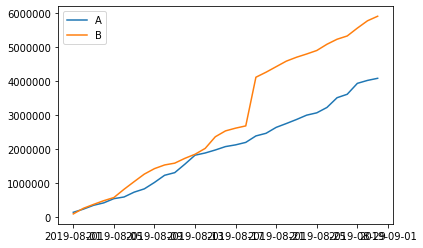

In [21]:
plt.plot(orders_grouped[orders_grouped['group'] == 'A']['date'], orders_grouped[orders_grouped['group'] == 'A']['revenue_cumsum'], label='A')
plt.plot(orders_grouped[orders_grouped['group'] == 'B']['date'], orders_grouped[orders_grouped['group'] == 'B']['revenue_cumsum'], label='B')
plt.legend()

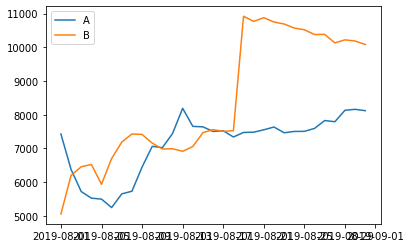

In [22]:
plt.plot(orders_grouped[orders_grouped['group'] == 'A']['date'], orders_grouped[orders_grouped['group'] == 'A']['revenue_cumsum'] / orders_grouped[orders_grouped['group'] == 'A']['users_cumsum'], label='A')
plt.plot(orders_grouped[orders_grouped['group'] == 'A']['date'], orders_grouped[orders_grouped['group'] == 'B']['revenue_cumsum'] / orders_grouped[orders_grouped['group'] == 'B']['users_cumsum'], label='B')
plt.legend()

In [23]:
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
           agg({'date' : 'max', 'group' : 'max', 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)


In [24]:
ordersAggregated.head(5)

,date,group,visitorId,revenue
55,2019-08-01,A,20,148579
66,2019-08-01,B,20,101217
175,2019-08-02,A,38,242401
173,2019-08-02,B,43,266748
291,2019-08-03,A,62,354874


In [25]:
cummulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue', 'visitorId']]
cummulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue', 'visitorId']]

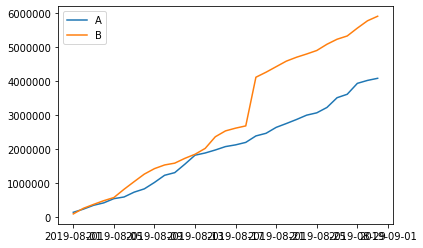

In [26]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()

<font color='blue'>Вывод</font> 
----
Выручка почти равномерно увеличивается в течение всего теста. 
Однако графики выручки группы __B__ в одной точке резко растет и начинает превышать график группы __А__. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 


# Комментарий наставника
А тут вылезла проблема, которую я, судя по всему, пропустил в прошлом проекте. 
Дело в том, что вас немного запутали, когда в качестве среднего чека предложили считать: сумму выручки деленое на кол-во уникальных пользователей. Я должен был обратить твоё внимание на это в прошлом проекте, но видимо упустил (или ты там сделал всё правильно, не помню, если честно).

Средний чек, разумеется, считается как выручка, на кол-во покупок. Т.е. мы напрасно упражнялись в расчете кол-ва уникальных пользователей выше. Можно было просто делать count.

# Постройть график кумулятивного среднего чека по группам. Сделать выводы и предположения.

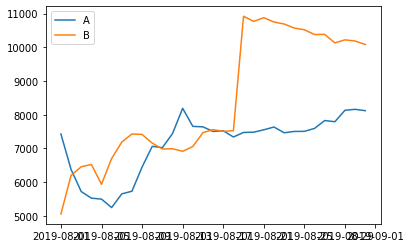

In [27]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['visitorId'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['visitorId'], label='B')
plt.legend()


<font color='blue'>Вывод</font> 
-----
Средний чек также в первой половине равномерный приблизительно в тот же период как и на графике кумулятивной выручки. При этом средний чек группы B падает. Возможно, в группу B данный переиод  попали крупные заказы (резкий всплеск на графике). Необходим больший временной диапазон, чтобы прийти к реальному среднему чеку и установиться на его уровне.

# Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [28]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

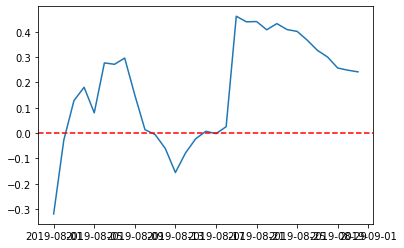

In [29]:
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['visitorIdB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['visitorIdA'])-1)
plt.axhline(y=0, color='red', linestyle='--')

<font color='blue'>Вывод</font> 
-----

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы

# Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

In [30]:
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
           agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

In [31]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [32]:
visitorsAggregatedA = visitorsAggregated[visitorsAggregated['group'] == 'A'][['date','visitors']]
visitorsAggregatedB = visitorsAggregated[visitorsAggregated['group'] == 'B'][['date','visitors']]

In [33]:
cummulativeData = pd.merge(mergedCummulativeRevenue, visitorsAggregatedA, on='date')
cummulativeData.columns = ['date', 'revenueA', 'visitorIdA', 'revenueB', 'visitorIdB', 'visitorsA']
cummulativeData = pd.merge(cummulativeData, visitorsAggregatedB, on='date')
cummulativeData.columns = ['date', 'revenueA', 'visitorIdA', 'revenueB', 'visitorIdB','visitorsA', 'visitorsB']

In [34]:
cummulativeData['conversionA'] = cummulativeData['visitorIdA']/cummulativeData['visitorsA']
cummulativeData['conversionB'] = cummulativeData['visitorIdB']/cummulativeData['visitorsB']

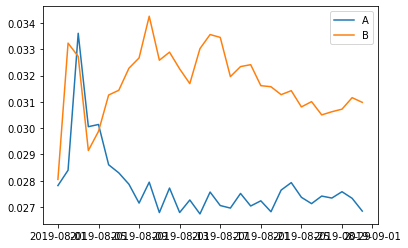

In [35]:
plt.plot(cummulativeData['date'], cummulativeData['conversionA'], label='A')
plt.plot(cummulativeData['date'], cummulativeData['conversionB'], label='B')
plt.legend()


<font color='blue'>Вывод</font> 
----

Симметричный график получился. Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и не зафиксировалась, а конверсия группы А просела и также не зафиксировалась.

# Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

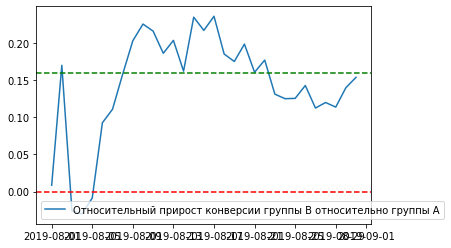

In [36]:
plt.plot(cummulativeData['date'], cummulativeData['conversionB']/cummulativeData['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.16, color='green', linestyle='--')


<font color='blue'>Вывод</font> 
-----

В целом группа В выигивает по отношению к группе А. Наблюдается один отритцательный пик, когда коверсия B равна или меньше группы А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 

# Построить точечный график стоимостей заказов. Сделать выводы и предположения.

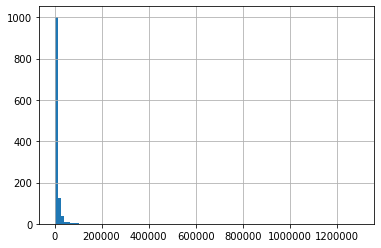

In [37]:
orders['revenue'].hist(bins=100)

<font color='blue'>Вывод</font> 
----
Из данного графика сложно сделать вывод о наличии выбросов

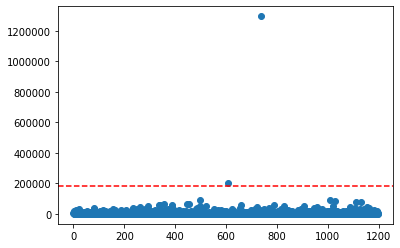

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=180000, color='red', linestyle='--')

<font color='blue'>Вывод</font> 
-----
Есть два выброса данные которых лежат выше 180000, которые могли значительно повлиять на значение среднего чека

# Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

# Комментарий наставника
Мне кажется, здесь можно было просто отсортировать по revenue и посмотреть самые большие значения. Там сразу можно будет увидеть, что есть один единстввенный заказ с большим отрывом. 

Результат будет тот же :) просто цифра 58233 станет более прозрачной и станет ясно, что именно мы с её помощью отсекаем. 

In [39]:
orders['revenue'].sort_values(ascending=False).head(15)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
662       78990
682       78990
743       67990
1103      66350
1099      65710
949       60450
940       58550
873       58220
1029      58220
60        56650
Name: revenue, dtype: int64

In [40]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<font color='blue'>Вывод</font> 
----
Не более 5% пользователей оформляли заказ на сумму больше чем 28000 д.е. И 1% пользователей заказывали более 58233.2 д.е.
Разумно выбрать 58233.2 за один заказ за нижнюю границу числа стоимости 1 заказа, и отсеять аномальные заказы по ней. 

# Построить точечный график количества заказов по пользователям. Сделать выводы и предположения. 

In [41]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId').agg({'transactionId' : pd.Series.nunique})

# Комментарий наставника
Не очень понятный график, если честно. 
Я понимаю, что просят именно точечный, но давай забьем на это требование и построим какой-нибудь человеческий. Мы хотим понять распределение пользователей по кол-ву заказов? Давай тогда построим гистограмму просто. 

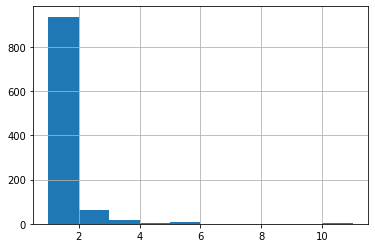

In [42]:
ordersByUsers['transactionId'].hist(bins = 10)

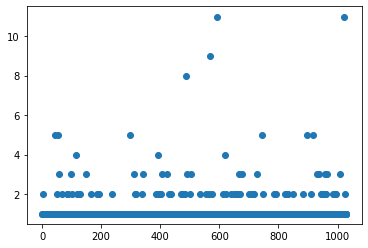

In [43]:
x_values = pd.Series(range(0,len(ordersByUsers['transactionId'])))
plt.scatter(x_values, ordersByUsers['transactionId'])


In [44]:
ordersByUsers.sort_values(by='transactionId',ascending=False).head(10)

,transactionId
visitorId,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5
3062433592,5
237748145,5
3803269165,5
1230306981,5


# Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.

In [45]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

<font color='blue'>Вывод</font> 
----
Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз.
Разумно выбрать  4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 


#  Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

In [46]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [47]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [48]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


In [49]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [50]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


Для оценки статистической значимости будем использовать метод Мана-Уитни
-----

In [51]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [52]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId']


In [53]:
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)


In [54]:
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: transactionId, dtype: int64

In [55]:
"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.00840'

In [56]:
"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'0.138'

<font color='blue'>Вывод</font> 
----
По «сырым» данным различий в конверсии групп A и B присуствует. Первое число — p-value = 0.0,0084 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом относительный выйгрыш группы B равен 13.8% — второе число в выводе.


# Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

In [57]:
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.365'

In [58]:
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)


'0.259'

<font color='blue'>Вывод</font> 
-----
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A. 

# Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

# <font color='red'>Комментарий наставника</font> 
Тут закралась очепятка, думаю, ты хотел написать что-то типа 
```
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233.2]['visitorId']
```
обрати внимание на знак неравенства (у тебя меньше, но нам ведь нужны аномально много купившие, чтобы потом их выкинуть).

In [59]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['transactionId'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['transactionId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['transactionId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])),name='transactionId')],axis=0)


In [61]:
abnormalUsers.head()

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64

In [62]:
"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.008'

In [63]:
"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.138'

<font color='blue'>Вывод</font> 
----
Результаты практически не изменились от анализа "сырых" данных.

# Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [64]:
"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])


'0.425'

In [65]:
"{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)


'-0.006'

In [66]:
orders.head()

,transactionId,visitorId,date,revenue,group,first_visit
102,3328372908,381340408,2019-08-01,2995,A,1
155,891673177,572335325,2019-08-01,3760,A,1
104,627804981,611059232,2019-08-01,17600,A,1
144,365058890,611059232,2019-08-01,2750,A,0
145,735232225,611059232,2019-08-01,8800,A,0


<font color='blue'>Вывод</font> 
----
P-value увеличился, при этом разница между сегментами увеличилась с 25,9 % до 378,1%.

# <font color='blue'>Общий вывод по разделу</font>  

   Необработанные данные
   ------
   1. Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки группы B в одной точке резко растет и начинает превышать график группы А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 
   2. Средний чек также в первой половине равномерный приблизительно в тот же период как и на графике кумулятивной выручки. При этом средний чек группы B падает. Возможно, в группу B данный переиод  попали крупные заказы (резкий всплеск на графике). Необходим больший временной диапазон, чтобы прийти к реальному среднему чеку и установиться на его уровне.
   3. В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы.
   4. Графики конверсии получились семетричными. Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и не зафиксировалась, а конверсия группы А просела и также не зафиксировалась.
   5. В целом группа В выигивает по отношению к группе А. Наблюдается один отритцательный пик, когда коверсия B равна или меньше группы А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
   
   
   Поиск выбросов
   -----
   1. Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз. Разумно выбрать  4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 
   2. Не более 5% пользователей оформляли заказ на сумму больше чем 28000 д.е. И 1% пользователей заказывали более 58233.2 д.е. Разумно выбрать 58233.2 за один заказ за нижнюю границу числа стоимости 1 заказа, и отсеять аномальные заказы по ней. 
   
   
   Анализ статистической значимости "сырых" данных
   -------
   1. По «сырым» данным существуют различия в конверсии групп A и B. p-value = 0.0,0084 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом относительный выйгрыш группы B равен 13.8%.
   2. P-value среднего чека значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A. 
   

   Анализ статистической значимости "отфильтрованных" данных
   -------
   1. Результаты по конверсии практически не изменились от сырых данных.
   2. P-value среднего чека группы B и группы A увеличился, при этом разница между сегментами увеличилась с 25,9 % до 378,1%.
   
   
   Принять решение по результатам теста. 
   -----
   
   1.	Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
   2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
   3.	График различия конверсии между группами сообщает, что результаты группы B лучше группы A и при этом значение колеблется:
   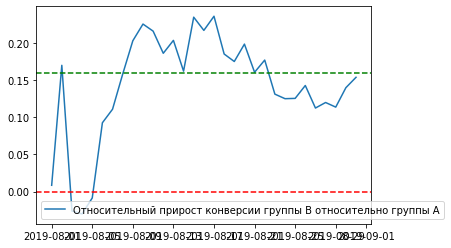

   4. График различия среднего чека говорит о том, что результаты группы B в целом лучше чем группы А, однако есть отритцательный пик, и имеются колебания. 
   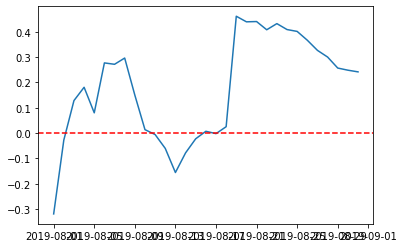 
  

 В целом значения группы B лучше чем показатели по группе А, но данные не стабильны и могут со временем ухудшится. Следует обратить внимание, что растет относительная конверсия, но при этом происходит падение относительного среднего чека. В следствии этого, лучше воспользоваться одним из двух вариантов:
   
   I. Продолжить тест.
       
   II. Декомпозировать "улучшение" и протестировать отдельные его компоненты (при условии если "улучшение" было комплексным) и подготовить новый тест. 

-------------------------

# <font color='red'>Резюме о проделанной работе</font>  

-------------------------

I этап
-----
   1. Применил фреймворк ICE для приоритизации гипотез. Отсортировал их по убыванию приоритета.
   2. Применил фреймворк RICE для приоритизации гипотез. Отсортировал их по убыванию приоритета.
   3. Определил изменение приоритизации гипотез при применении RICE вместо ICE. 

II этап
-----

Проанализирован A/B-тест:
   1. Построин график кумулятивной выручки по группам. Сделаны выводы и предположения.
   2. Построин график кумулятивного среднего чека по группам. Сделаны выводы и предположения.
   3. Построин график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   4. Построин график кумулятивной конверсии по группам. Сделаны выводы и предположения.
   5. Построин график относительного изменения кумулятивной конверсии группы B к группе A. Сделаны выводы и предположения.
   6. Построин точечный график количества заказов по пользователям. Сделаны выводы и предположения.
   7. Посчитатны 95-й и 99-й перцентили количества заказов на пользователя. Выбрал границу для определения аномальных пользователей.
   8. Построин точечный график стоимостей заказов. Сделаны выводы и предположения.
   9. Посчитатны 95-й и 99-й перцентили стоимости заказов. Выбрал границу для определения аномальных заказов.
   10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаны выводы и предположения.
   11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаны выводы и предположения.
   12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаны выводы и предположения.
   13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаны выводы и предположения.
   14. Приняты решение по результатам теста и объясните его. Варианты решений: 



# <font color='red'>Выводы по работе</font>  

# Вывод по I этапу 

1. При определении приоритизации задача методом __ICE__ получилась следующая структура:
   - запустить акцию, дающую скидку на товар в день рождения __(9 задача)__;
   - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей __(1 задача)__;
   - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок __(8 задача)__;
   - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию __(7 задача)__;
   - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа __(3 задача)__;
   - запустить собственную службу доставки, что сократит срок доставки заказов __(2 задача)__;
   - добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов __(6 задача)__;
   - изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар __(4 задача)__;
   - изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей __(5 задача)__.	
   
   
2. При определении приоритизации задача методом __RICE__ получилась следующая структура:
   - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок __(8 задача)__;
   - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	__(3 задача)__;
   - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	__(1 задача)__;
   - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	__(7 задача)__;
   - запустить акцию, дающую скидку на товар в день рождения	__(9 задача)__;
   - изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар __(4 задача)__;
   - запустить собственную службу доставки, что сократит срок доставки заказов	__(2 задача)__;
   - добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	__(6 задача)__;
   - изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	__(5 задача)__.
   
3. Изменилась приоритизация гипотез при применении RICE вместо ICE. Это изменяется охватом потребителей, которых затронет пользователей - фактор __REACH (Охват пользователей)__. 

__PS__. _Могу ошибаться: Если мы используем метод ICE, то приемущество отдается краткосрочным мероприятиям, направленным на стимулирование отдельных групп потребеителей покупать __здесь и сейчас__, метод RICE  ставит в приоритет задачи на тактичиеском уровне: удержание клиентов и расширение продаж (по данному примеру). Для применения того или иного метода определении приоритизации задача зависит от целей, которая ставит компания в среднесрочной и краткосрочной перспективах и имеющихся ресурсов у компании._

# Вывод по II этапу 


   Необработанные данные
   ------
   1. Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки группы B в одной точке резко растет и начинает превышать график группы А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 
   2. Средний чек также в первой половине равномерный приблизительно в тот же период как и на графике кумулятивной выручки. При этом средний чек группы B падает. Возможно, в группу B данный переиод  попали крупные заказы (резкий всплеск на графике). Необходим больший временной диапазон, чтобы прийти к реальному среднему чеку и установиться на его уровне.
   3. В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы и выбросы.
   4. Графики конверсии получились семетричными. Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и не зафиксировалась, а конверсия группы А просела и также не зафиксировалась.
   5. В целом группа В выигивает по отношению к группе А. Наблюдается один отритцательный пик, когда коверсия B равна или меньше группы А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
   
   
   Поиск выбросов
   -----
   1. Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз. Разумно выбрать  4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 
   2. Не более 5% пользователей оформляли заказ на сумму больше чем 28000 д.е. И 1% пользователей заказывали более 58233.2 д.е. Разумно выбрать 58233.2 за один заказ за нижнюю границу числа стоимости 1 заказа, и отсеять аномальные заказы по ней. 
   
   
   Анализ статистической значимости "сырых" данных
   -------
   1. По «сырым» данным существуют различия в конверсии групп A и B. p-value = 0.0,0084 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. При этом относительный выйгрыш группы B равен 13.8%.
   2. P-value среднего чека значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A. 
   

   Анализ статистической значимости "отфильтрованных" данных
   -------
   1. Результаты по конверсии практически не изменились от сырых данных.
   2. P-value среднего чека группы B и группы A увеличился, при этом разница между сегментами увеличилась с 25,9 % до 378,1%.
   
   
   Принять решение по результатам теста. 
   -----
   
   1.	Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
   2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
   3.	График различия конверсии между группами сообщает, что результаты группы B лучше группы A и при этом значение колеблется:
   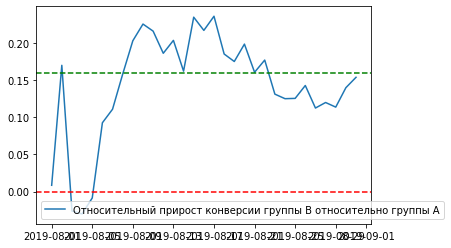

   4. График различия среднего чека говорит о том, что результаты группы B в целом лучше чем группы А, однако есть отритцательный пик, и имеются колебания. 
   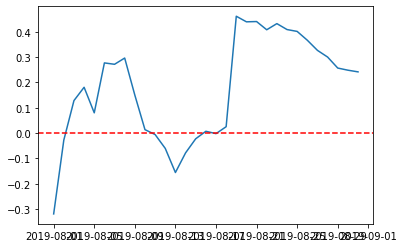

 В целом значения группы B лучше чем показатели по группе А, но данные не стабильны и могут со временем ухудшится. Следует обратить внимание, что растет относительная конверсия, но при этом происходит падение относительного среднего чека. В следствии этого, лучше воспользоваться одним из двух вариантов:
   
   I. Продолжить тест.
       
   II. Декомпозировать "улучшение" и протестировать отдельные его компоненты (при условии если "улучшение" было комплексным) и подготовить новый тест.